# ROI and Arethmatic Lab

In this lab we need to generate this output

![Image](Files/21_output.png)

## Criteria
- Logo width must be 150px.
- Ratio must be reserved.
- Must be 10px away from right and bottom sides.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

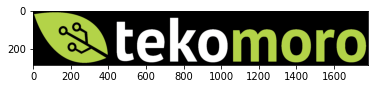

In [2]:
img = cv2.imread('Files/tekomoro.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [3]:
img.shape 

(287, 1780, 3)

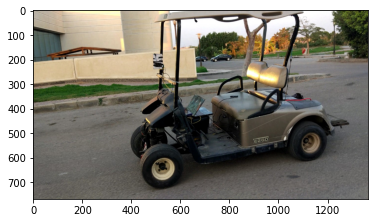

In [4]:
img2 = cv2.imread('Files/carkyo.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [5]:
img2.shape

(768, 1365, 3)

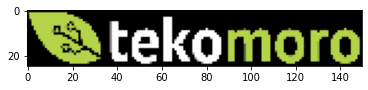

In [7]:
logo = cv2.resize(img,(150,25), interpolation = cv2.INTER_CUBIC)

logo.shape
plt.imshow(logo)

(25, 150, 3)

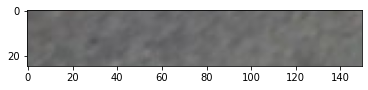

In [8]:
roi = img2[733:733+logo.shape[0], 1205:1205+logo.shape[1]]
plt.imshow(roi);
roi.shape

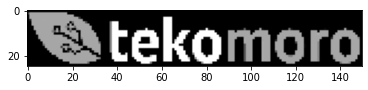

In [9]:
gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray');

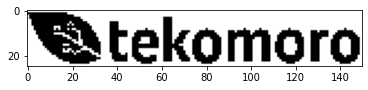

In [10]:
ret, mask = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
plt.imshow(mask, cmap='gray');

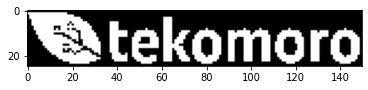

In [11]:
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv, cmap='gray');

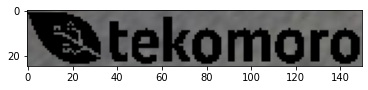

In [12]:
img_bg = cv2.bitwise_and(roi, roi, mask=mask)
plt.imshow(img_bg);

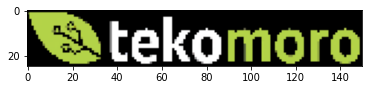

In [13]:
img_fg = cv2.bitwise_and(logo, logo, mask=mask_inv)
plt.imshow(img_fg);

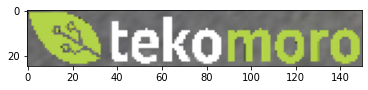

In [14]:
dst = cv2.add(img_bg, img_fg)
plt.imshow(dst);

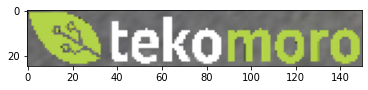

In [15]:
temp = cv2.addWeighted(img_bg, 1, img_fg, 1, 0)
plt.imshow(temp);

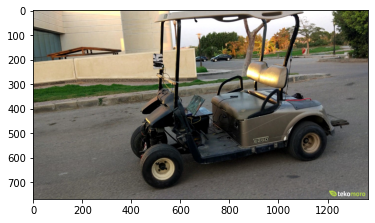

In [16]:
out = img2.copy()
out[733:733+logo.shape[0], 1205:1205+logo.shape[1]] = dst
plt.imshow(out);

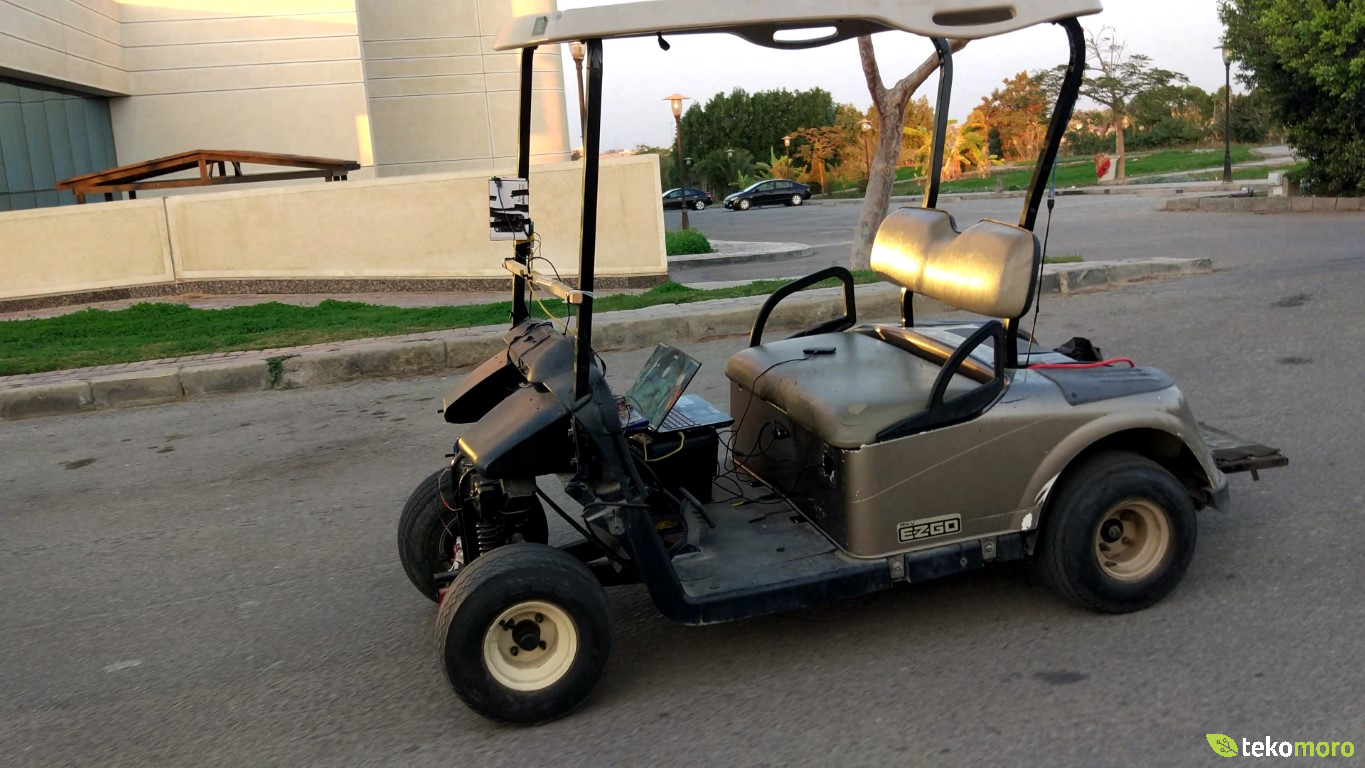

In [17]:
display(Image.fromarray(out))